<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#Degree-distribution" data-toc-modified-id="Degree-distribution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Degree distribution</a></span></li><li><span><a href="#Dijkstra's-algorithm" data-toc-modified-id="Dijkstra's-algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dijkstra's algorithm</a></span></li></ul></div>

# Load libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Degree distribution

In [2]:
# Generate random graph
G = nx.gnp_random_graph(6, 0.4, seed=10374196)

In [3]:
# Define new function that plots the degree distribution
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

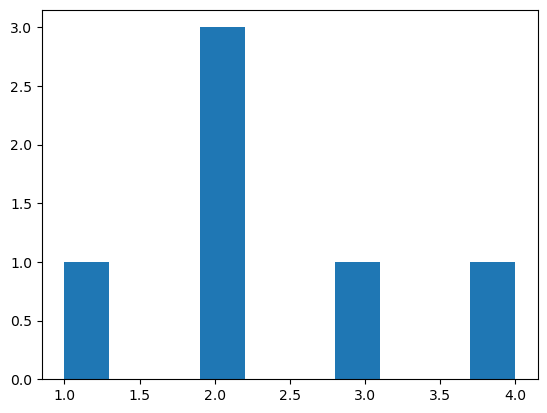

In [4]:
plot_degree_dist(G)

# Dijkstra's algorithm

In [5]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class Graph():

    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])

    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):

        # Initialize minimum distance for next node
        min_dist = 1e7

        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min_dist and sptSet[v] == False:
                min_dist = dist[v]
                min_index = v

        return min_index

    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):

        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V

        for cout in range(self.V):

            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)

            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True

            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                sptSet[v] == False and
                dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]

        self.printSolution(dist)

# Driver program
g = Graph(9)
g.graph = [[0,  4, 0,  0,  0,  0, 0,  8, 0],
           [4,  0, 8,  0,  0,  0, 0, 11, 0],
           [0,  8, 0,  7,  0,  4, 0,  0, 2],
           [0,  0, 7,  0,  9, 14, 0,  0, 0],
           [0,  0, 0,  9,  0, 10, 0,  0, 0],
           [0,  0, 4, 14, 10,  0, 2,  0, 0],
           [0,  0, 0,  0,  0,  2, 0,  1, 6],
           [8, 11, 0,  0,  0,  0, 1,  0, 7],
           [0,  0, 2,  0,  0,  0, 6,  7, 0]
        ]

g.dijkstra(0)

# This code is contributed by Divyanshu Mehta


Vertex 	 Distance from Source
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


Note that this example graph is symmetric

In [6]:
np.matrix(g.graph) == np.matrix(g.graph).T

matrix([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

0 1 {'weight': 4}


{(0, 1): Text(-0.2259594257682635, 0.763712858243625, '4'),
 (0, 7): Text(-0.4244815168660087, 0.7807894394755537, '8'),
 (1, 2): Text(0.08687636079675032, 0.2660807632301305, '8'),
 (1, 7): Text(-0.25638259671889657, 0.544503120629755, '11'),
 (2, 3): Text(0.4262154541435659, -0.20712720063936818, '7'),
 (2, 5): Text(0.3040679244431006, -0.2951890255202455, '4'),
 (2, 8): Text(-0.16748013723057464, 0.042370153239702724, '2'),
 (3, 4): Text(0.6799603407639452, -0.6076556071356558, '9'),
 (3, 5): Text(0.49866234279909616, -0.5070349700646202, '14'),
 (4, 5): Text(0.5578101613953519, -0.6957192590035932, '10'),
 (5, 6): Text(-0.05906983095813012, -0.47920796006432864, '2'),
 (6, 7): Text(-0.47478025216926434, 0.09912681971743798, '1'),
 (6, 8): Text(-0.5306197144704914, -0.1416436337582988, '6'),
 (7, 8): Text(-0.5107377034986018, 0.3208055715928051, '7')}

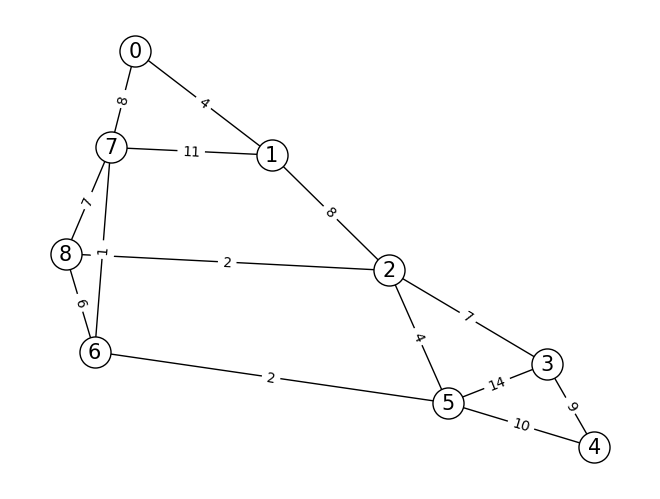

In [7]:
# Create graph from adjacency matrix
G = nx.from_numpy_array(np.matrix(g.graph))

# Check edge attributes
for u,v,data in G.edges.data():
    print(u, v, data)
    break

# Plot graph
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
# Get edge labels
edge_labels = nx.get_edge_attributes(G, "weight")

# Parse paramaters though a dictionary
options = {
    "font_size": 15,
    "node_size": 500,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}
nx.draw(G, pos, with_labels=True, **options)
nx.draw_networkx_edge_labels(G, pos, edge_labels)